In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
# Load libraries
from sklearn.dummy import DummyClassifier
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge

In [53]:
# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [54]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.002033  , 0.00208545, 0.00199199, 0.00095391, 0.00105381]),
 'score_time': array([0.00094819, 0.        , 0.        , 0.        , 0.00095987]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

In [63]:
# Linear Regression
lr = LinearRegression()
lr_score = cross_val_score(lr, Xtrain, Ytrain)

# RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=20, random_state=0)
rfr_score = cross_val_score(rfr, Xtrain, Ytrain)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor() 
gbr_score = cross_val_score(rfr, Xtrain, Ytrain)

# Test
r = Ridge(alpha=1.0)
r_score = cross_val_score(rfr, Xtrain, Ytrain)

dtc = DecisionTreeClassifier()
dtc_score = cross_val_score(dtc, Xtrain, Ytrain)


In [67]:
lengthCross = list(range(1,len(lr_score)+1))

# Linear regression
df = pd.DataFrame(lr_score)
df['Model'] = 'LinearRegression'
df['CrossValidation'] = lengthCross

# Random Forest Regressor
df2 = pd.DataFrame(rfr_score)
df2['Model'] = 'RandomForestRegressor'
df2['CrossValidation'] = lengthCross

# Gradient Boosting Regressor
df3 = pd.DataFrame(gbr_score)
df3['Model'] = 'GradientBoostingRegressor'
df3['CrossValidation'] = lengthCross

## Merge dataframes
frame = df.append(df2)
frame = frame.append(df3)

frame.columns = ['Accurancy', 'Model','CrossValidation']

In [70]:
frame['Model'].unique()

array(['LinearRegression', 'RandomForestRegressor',
       'GradientBoostingRegressor'], dtype=object)

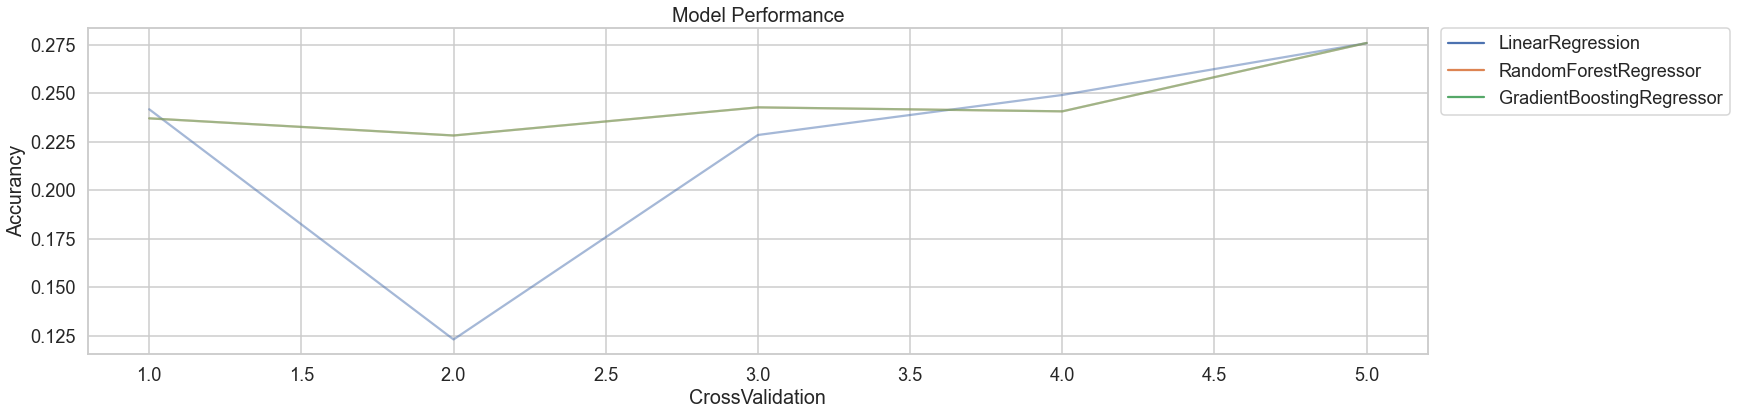

In [69]:
## Reset Index to plot
frame.reset_index(inplace=True)

## Libs for Plotting
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(8,4))
sns.lineplot(x="CrossValidation", y="Accurancy",alpha=0.5,hue="Model",data=frame)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Model Performance")
#plt.tight_layout()
plt.gcf().set_size_inches((24, 6))

As shown in teh graph Linear Regression is fluxuation more when it comes to the the accuracy. At a crossvalidation of 2, the accuracy is down to a accuracy of 0.125. 



### Hyper parameter tuning

In [73]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score , cross_validate, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [86]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [131]:
gbc = GradientBoostingRegressor()

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2 , 0.4 , 0.6, 0.8],
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[1, 2, 3, 4, 5,6,7,8,9,10,15,20,30,40,50],
    "max_features":["log2","sqrt" ,1,2,3,4,5,6,7,8,9,11,13,15,17,19,21],
    "criterion": ["friedman_mse",  "mse"], 
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(gbc, parameters,  refit=False,cv=2, n_jobs=-4) # scoring=scoring,

clf.fit(Xtrain, Ytrain)

print ("Best Score: {}".format(clf.best_score_))
print ("Best params: {}".format(clf.best_params_))

KeyboardInterrupt: 

In [115]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [116]:
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()

In [124]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])

n_components = list(range(1,X.shape[1]+1,1))

C = np.logspace(-4, 4, 50)
penalty = ['l2']

parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

In [126]:
clf_GS = GridSearchCV(pipe, parameters)
testt = cross_val_score(clf_GS, Xtrain, Ytrain)
#clf_GS.fit(Xtrain, Ytrain)

In [ ]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

array([nan, nan, nan, nan, nan])

In [ ]:
------------------------------------------------

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

rfc_clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = rfc_clf.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


ValueError: Unknown label type: 'continuous'

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [114]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = GridSearchCV(logistic, distributions)

ValueError: Parameter grid for parameter (C) needs to be a list or numpy array, but got (<class 'scipy.stats._distn_infrastructure.rv_frozen'>). Single values need to be wrapped in a list with one element.

In [112]:
search = clf.fit(Xtrain, Ytrain)
search.best_params_

ValueError: Unknown label type: 'continuous'